## **Detection of Obesity Among the Population**
Group Members: Aditya Jain, Ahmed Omar, Divine Ahuchogu, Yedu Krishnan 

---

## Introduction

Today, many people around the world struggle with obesity or being overweight, along with the complications that may arise with a higher body weight. Studies have shown that obesity
increases the risk of several debilitating and deadly diseases, including diabetes, heart disease, and some cancers [2]. Over the years, obesity levels have been increasing. In fact, based on data from 1975 till now, the levels have tripled [3]. Our question is: what is the reason for such a difference in the increasing obesity levels in just few decades? According to the World Health Organization(WHO), obesity is estimated to be a contributing factor in approximately 44% of the global burden of type 2 diabetes, 23% of ischemic heart disease burden, and 7-41% of certain cancer burdens [3]. Our goal is to find out how factors like age, gender, height, and weight is correlated with  the obesity levels in people. Our main objective is to use our acquired knowledge from the dataset found to predict the levels of obesity in people based on their lifestyle choices.

## Dataset

The dataset we chose has been obtained from the UC Irvine Machine Learning Repository,
with 2111 rows and 17 columns [1]. Furthermore, the dataset focuses on the estimation of obesity
levels from three countries, including Mexico, Peru, and Colombia and is based on their physical
health as well as their eating habits. The variables include:
1) Gender
2) Age
3) Height
4) Weight
5) family_history_with_overweight
6) FAVC (Do you eat high caloric food frequently?)
7) FCVC (Do you usually eat vegetables in your meals?)
8) NCP (How many main meals do you have daily?)
9) CAEC (Do you eat any food between meals?)
10) SMOKE (Do you smoke?)
11) CH2O (how much water do you drink daily?)
12) SCC (Do you monitor the calories you eat daily?)
13) FAF (How often do you have physical activity?)
14) TUE (How much time do you use technology like phones, videogames, etc.)
15) CALC (How often do you drink alcohol?)
16) MTRANS (Which transportation do you usually use?
17) NObeyesdad (Obesity level)

## Data Cleaning

Most of the data was somewhat clean, but the inclusion of multiple categorical variables required us to convert these columns into dummy variables to ensure numerical values were used for the logistic regression analysis. All columns were therefore converted and converted into integers. Columns were renamed below to simplify what each column is meant to represent and one column (CAEC) was dropped. Lastly, we converted the outcome(obesity) into two number of classes to simplify the analysis instead of having 7 different classes. Therefore, class sizes for obesity were 1552 and normal weight was 559. 


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import statsmodels.api as sm


In [2]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
# Categorize 'NObeyesdad' as either 1 for "obese/overweight" or 0 for "normal"
data['NObeyesdad'] = data['NObeyesdad'].apply(lambda x: 0 if x in ['Normal_Weight', 'Insufficient_Weight'] else 1)

# Verify the changes by displaying the unique values of the modified 'NObeyesdad' column
data['NObeyesdad'].unique(), data.head()


(array([0, 1]),
    Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
 0  Female  21.0    1.62    64.0                            yes   no   2.0   
 1  Female  21.0    1.52    56.0                            yes   no   3.0   
 2    Male  23.0    1.80    77.0                            yes   no   2.0   
 3    Male  27.0    1.80    87.0                             no   no   3.0   
 4    Male  22.0    1.78    89.8                             no   no   2.0   
 
    NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
 0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
 1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
 2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
 3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
 4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
 
                   MTRANS  NObeyesdad  
 0  Public_Transportation           0  
 1  Public_Transportation           0  
 2  Public_Transportation 

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
dummy_variable = LabelEncoder()

# Define categorical columns excluding 'NObeyesdad'
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = dummy_variable.fit_transform(data[col])
 

In [5]:
# Convert the Age column to int
data['Age'] = data['Age'].astype(int)
data['FCVC'] = data['FCVC'].astype(int)
data['NCP'] = data['NCP'].astype(int)
data['CH2O'] = data['CH2O'].astype(int)
data['FAF'] = data['FAF'].astype(int)
data['TUE'] = data['TUE'].astype(int)

data.head(), data.dtypes


(   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
 0       0   21    1.62    64.0                               1     0     2   
 1       0   21    1.52    56.0                               1     0     3   
 2       1   23    1.80    77.0                               1     0     2   
 3       1   27    1.80    87.0                               0     0     3   
 4       1   22    1.78    89.8                               0     0     2   
 
    NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
 0    3     2      0     2    0    0    1     3       3           0  
 1    3     2      1     3    1    3    0     2       3           0  
 2    3     2      0     2    0    2    1     1       3           0  
 3    3     2      0     2    0    2    0     1       4           1  
 4    1     2      0     2    0    0    0     2       3           1  ,
 Gender                              int64
 Age                                 int64
 Height          

In [6]:
# Save the modified dataset to a new CSV file
# newfile = 'Obesity_Dataset.csv'
# data.to_csv(newfile, index=False)

# Return the path of the new file for download
# newfile


In [7]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
# Number of classes and size

num_classes = len(data['NObeyesdad'].unique())
class_sizes = data['NObeyesdad'].value_counts()

In [9]:
# Number of Classes
num_classes

2

In [10]:
# Size of Classes 
class_sizes

1    1552
0     559
Name: NObeyesdad, dtype: int64

In [11]:
data = data.rename(columns={"FAVC": "High_Calorie", 
                        "FCVC": "Vegetables", 
                        "NCP" :"Number_of_meals", 
                        "SMOKE" :"Smoke", 
                        "CH2O":"Water_consumption", 
                        "CALC":"Alcohol_consumption",
                        "MTRANS": "Transportation_method",
                        "FAF": "Physical_Acitivity",
                        "TUE": "Time_on_Technology",
                        "SCC": "Calorie_Monitoring",
                        "NObeyesdad": "Outcome"})
                        
data

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,CAEC,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome
0,0,21,1.620000,64.000000,1,0,2,3,2,0,2,0,0,1,3,3,0
1,0,21,1.520000,56.000000,1,0,3,3,2,1,3,1,3,0,2,3,0
2,1,23,1.800000,77.000000,1,0,2,3,2,0,2,0,2,1,1,3,0
3,1,27,1.800000,87.000000,0,0,3,3,2,0,2,0,2,0,1,4,1
4,1,22,1.780000,89.800000,0,0,2,1,2,0,2,0,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,2,0,1,0,1,0,2,3,1
2107,0,21,1.748584,133.742943,1,1,3,3,2,0,2,0,1,0,2,3,1
2108,0,22,1.752206,133.689352,1,1,3,3,2,0,2,0,1,0,2,3,1
2109,0,24,1.739450,133.346641,1,1,3,3,2,0,2,0,1,0,2,3,1


In [12]:
data = data.drop(columns=['CAEC'])
data

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome
0,0,21,1.620000,64.000000,1,0,2,3,0,2,0,0,1,3,3,0
1,0,21,1.520000,56.000000,1,0,3,3,1,3,1,3,0,2,3,0
2,1,23,1.800000,77.000000,1,0,2,3,0,2,0,2,1,1,3,0
3,1,27,1.800000,87.000000,0,0,3,3,0,2,0,2,0,1,4,1
4,1,22,1.780000,89.800000,0,0,2,1,0,2,0,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,0,1,0,1,0,2,3,1
2107,0,21,1.748584,133.742943,1,1,3,3,0,2,0,1,0,2,3,1
2108,0,22,1.752206,133.689352,1,1,3,3,0,2,0,1,0,2,3,1
2109,0,24,1.739450,133.346641,1,1,3,3,0,2,0,1,0,2,3,1


## Exploratory Data Analysis For Numeric Variables
---

In [13]:
# Describe basic statistics of the data
stats = data[['Age', 'Height', 'Weight']].describe()
stats

,Age,Height,Weight
count,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701677,86.586058
std,6.308664,0.093305,26.191172
min,14.000000,1.450000,39.000000
25%,19.000000,1.630000,65.473343
50%,22.000000,1.700499,83.000000
75%,26.000000,1.768464,107.430682
max,61.000000,1.980000,173.000000


### Correlation Between Variables


In [14]:
# Create a correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome
Gender,1.000000,0.050677,0.618466,0.161668,0.102512,0.064934,-0.317272,0.023921,0.044698,0.194832,-0.102633,0.174468,0.071148,0.007616,-0.137537,0.081192
Age,0.050677,1.000000,-0.030738,0.190263,0.195552,0.055872,-0.013240,-0.070632,0.097897,-0.090672,-0.111882,-0.163307,-0.234951,-0.043344,-0.601020,0.319274
Height,0.618466,-0.030738,1.000000,0.463136,0.247684,0.178364,-0.070032,0.214633,0.055499,0.191061,-0.133753,0.234248,-0.006181,-0.129732,-0.073609,0.115942
Weight,0.161668,0.190263,0.463136,1.000000,0.496820,0.272300,0.201087,0.126058,0.025746,0.052705,-0.201906,-0.158726,-0.274960,-0.206677,0.004610,0.696552
family_history_with_overweight,0.102512,0.195552,0.247684,0.496820,1.000000,0.208036,0.008332,0.052504,0.017385,0.053889,-0.185422,-0.128375,-0.097283,0.036676,-0.101540,0.489467
High_Calorie,0.064934,0.055872,0.178364,0.272300,0.208036,1.000000,-0.073482,-0.019162,-0.050660,-0.082638,-0.190658,-0.156302,-0.054783,-0.089520,-0.069800,0.218290
Vegetables,-0.317272,-0.013240,-0.070032,0.201087,0.008332,-0.073482,1.000000,0.138510,0.025567,0.037495,0.070328,0.019344,-0.150120,-0.085690,0.105084,-0.040917
Number_of_meals,0.023921,-0.070632,0.214633,0.126058,0.052504,-0.019162,0.138510,1.000000,0.035825,0.067431,-0.006166,0.126888,0.028048,-0.116039,-0.012480,-0.133724
Smoke,0.044698,0.097897,0.055499,0.025746,0.017385,-0.050660,0.025567,0.035825,1.000000,0.014689,0.047731,0.022590,0.063889,-0.082471,-0.010702,-0.017651
Water_consumption,0.194832,-0.090672,0.191061,0.052705,0.053889,-0.082638,0.037495,0.067431,0.014689,1.000000,0.070662,0.266097,0.095753,-0.041402,0.044987,0.002268


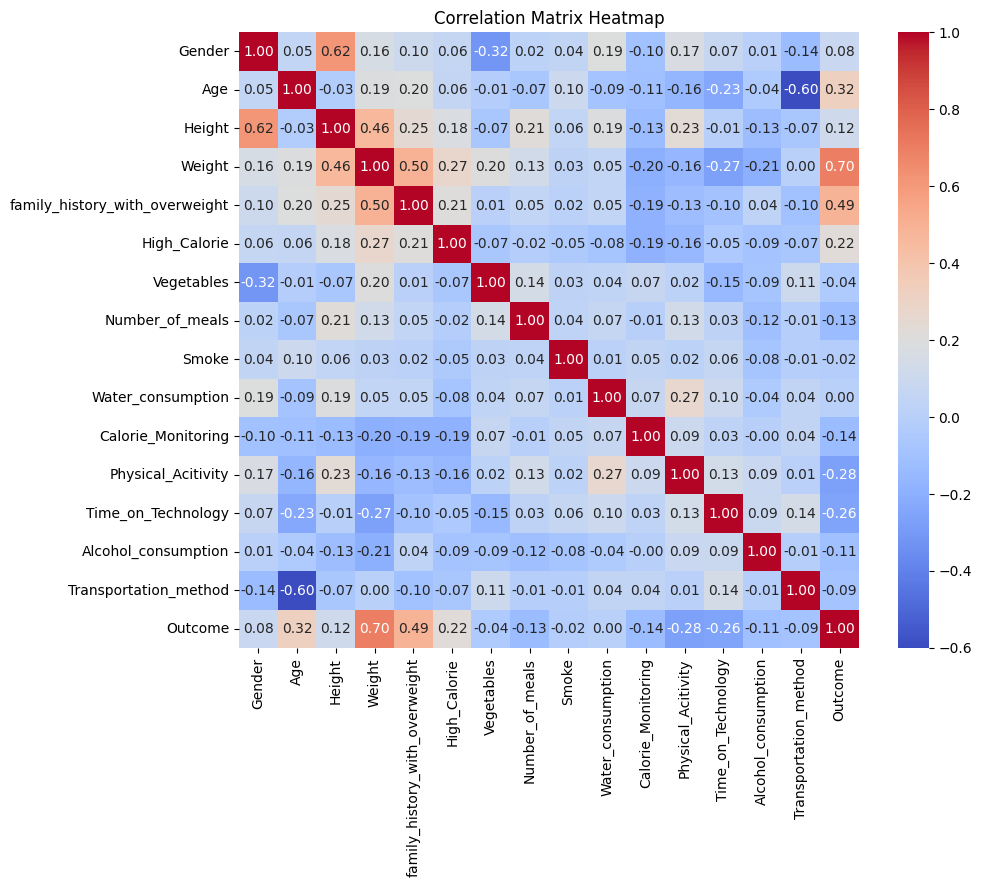

In [15]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Histogram

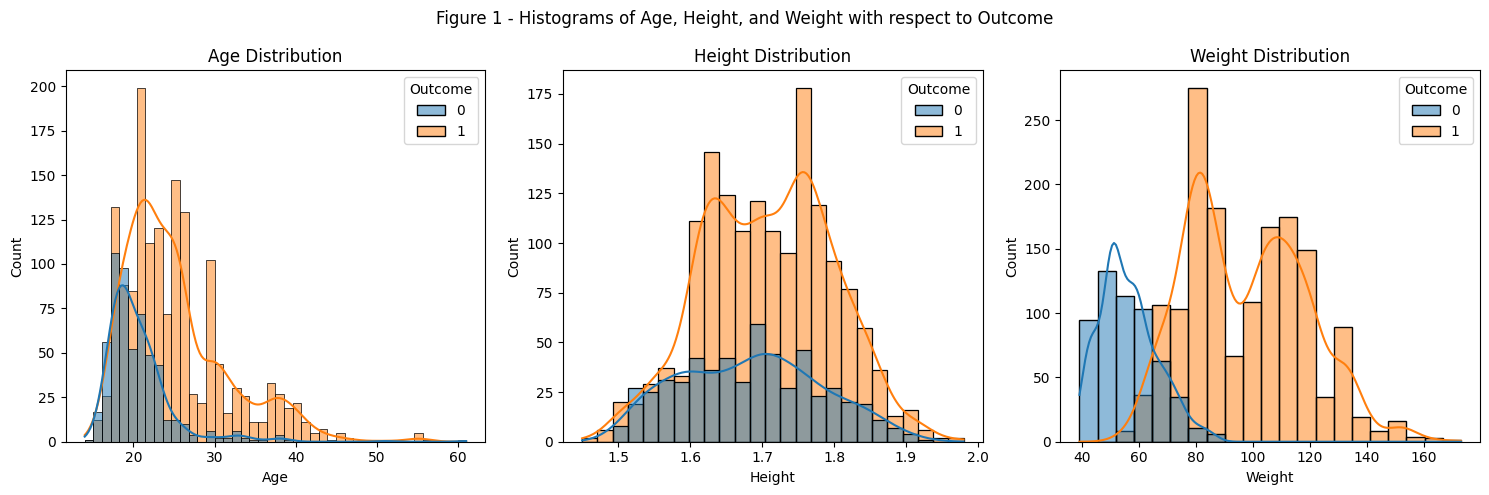

In [16]:
# Create subplots 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create Histograms
sns.histplot(data=data, x='Age', hue='Outcome', ax=axes[0], kde=True)
sns.histplot(data=data, x='Height', hue='Outcome', ax=axes[1], kde=True)
sns.histplot(data=data, x='Weight', hue='Outcome', ax=axes[2], kde=True)

# Set titles
axes[0].set_title('Age Distribution')
axes[1].set_title('Height Distribution')
axes[2].set_title('Weight Distribution')

# Addtitle
plt.suptitle('Figure 1 - Histograms of Age, Height, and Weight with respect to Outcome')
plt.tight_layout()
plt.show()


### Boxplots

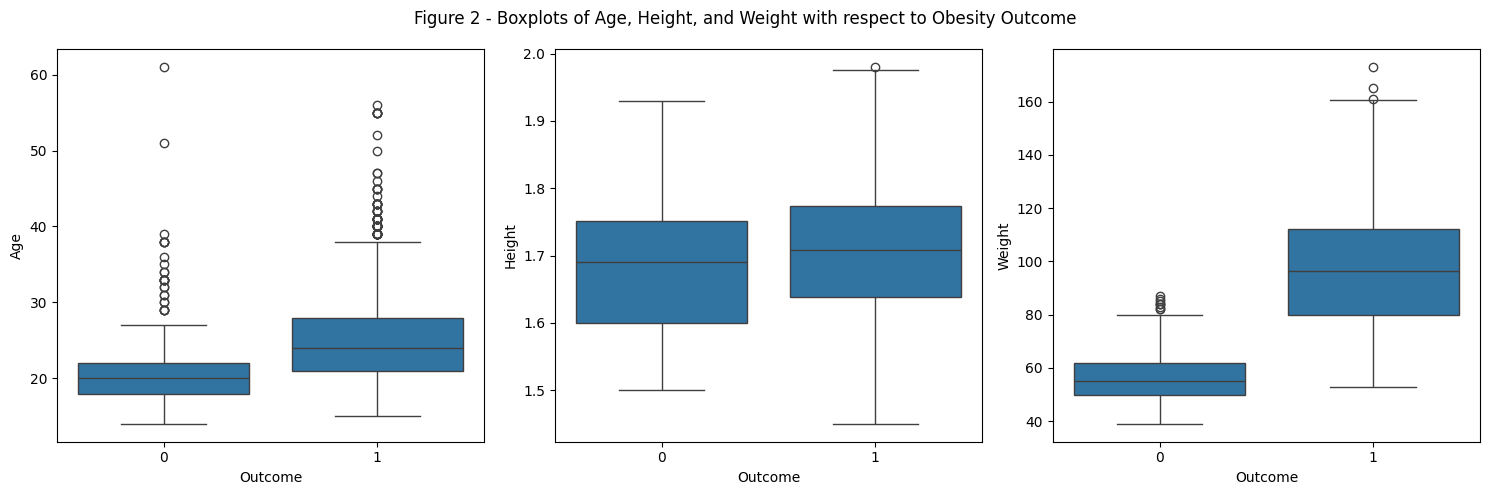

In [17]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create boxplots
sns.boxplot(x='Outcome', y='Age', data=data, ax=axes[0])
sns.boxplot(x='Outcome', y='Height', data=data, ax=axes[1])
sns.boxplot(x='Outcome', y='Weight', data=data, ax=axes[2])

# Add title 
plt.suptitle('Figure 2 - Boxplots of Age, Height, and Weight with respect to Obesity Outcome')

# Show plot
plt.tight_layout()
plt.show()

### T-test Analysis


**H0:  The difference between the two means for each variable is equal to 0**

**HA: The difference between the two means for each variable is NOT equal to 0**


In [18]:
# Get data for each obesity group
outcome_0_age = data[data['Outcome'] == 0]['Age']
outcome_1_age = data[data['Outcome'] == 1]['Age']

# Perform independent t-test
t_statistic, p_value = ttest_ind(outcome_0_age, outcome_1_age)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level ({}).".format(alpha))
    print("We reject the null hypothesis.")
    print("There are statistically significant differences in the means of 'Age' between 'Outcome' 0 and 'Outcome' 1.")
else:
    print("The p-value is greater than or equal to the significance level ({}).".format(alpha))
    print("We fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude that there are statistically significant differences in the means of 'Age' between 'Outcome' 0 and 'Outcome' 1.")

t-statistic: -15.472059861050024
p-value: 3.13684167568846e-51
The p-value is less than the significance level (0.05).
We reject the null hypothesis.
There are statistically significant differences in the means of 'Age' between 'Outcome' 0 and 'Outcome' 1.


In [19]:
# Extract data for each outcome group
outcome_0_age = data[data['Outcome'] == 0]['Height']
outcome_1_age = data[data['Outcome'] == 1]['Height']

# Perform independent t-test
t_statistic, p_value = ttest_ind(outcome_0_age, outcome_1_age)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level ({}).".format(alpha))
    print("We reject the null hypothesis.")
    print("There are statistically significant differences in the means of 'Height' between 'Outcome' 0 and 'Outcome' 1.")
else:
    print("The p-value is greater than or equal to the significance level ({}).".format(alpha))
    print("We fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude that there are statistically significant differences in the means of 'Age' between 'Outcome' 0 and 'Outcome' 1.")

t-statistic: -5.360643438325278
p-value: 9.198557665531669e-08
The p-value is less than the significance level (0.05).
We reject the null hypothesis.
There are statistically significant differences in the means of 'Height' between 'Outcome' 0 and 'Outcome' 1.


In [20]:
# Extract data for each outcome group
outcome_0_age = data[data['Outcome'] == 0]['Weight']
outcome_1_age = data[data['Outcome'] == 1]['Weight']

# Perform independent t-test
t_statistic, p_value = ttest_ind(outcome_0_age, outcome_1_age)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level ({}).".format(alpha))
    print("We reject the null hypothesis.")
    print("There are statistically significant differences in the means of 'Weight' between 'Outcome' 0 and 'Outcome' 1.")
else:
    print("The p-value is greater than or equal to the significance level ({}).".format(alpha))
    print("We fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude that there are statistically significant differences in the means of 'Weight' between 'Outcome' 0 and 'Outcome' 1.")

t-statistic: -44.58264387932105
p-value: 2.1549186262045755e-306
The p-value is less than the significance level (0.05).
We reject the null hypothesis.
There are statistically significant differences in the means of 'Weight' between 'Outcome' 0 and 'Outcome' 1.


### Bar Graph 

In [21]:
# Count the frequency of individuals with and without family history of overweight for each outcome category
family_history_counts = data.groupby(["family_history_with_overweight"])["Outcome"].value_counts().reset_index(name='count')
family_history_counts

,family_history_with_overweight,Outcome,count
0,0,0,278
1,0,1,107
2,1,1,1445
3,1,0,281


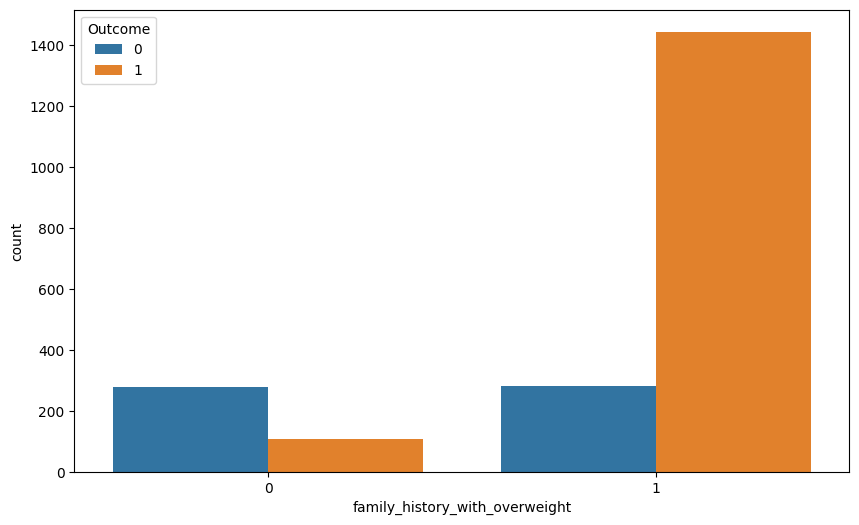

In [22]:
# Plot the Bar Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=family_history_counts, x='family_history_with_overweight', y='count', hue='Outcome')

# Show the plot
plt.legend(title='Outcome')
plt.show()

## PCA

In [23]:
data_copy = data.copy()
data_copy

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome
0,0,21,1.620000,64.000000,1,0,2,3,0,2,0,0,1,3,3,0
1,0,21,1.520000,56.000000,1,0,3,3,1,3,1,3,0,2,3,0
2,1,23,1.800000,77.000000,1,0,2,3,0,2,0,2,1,1,3,0
3,1,27,1.800000,87.000000,0,0,3,3,0,2,0,2,0,1,4,1
4,1,22,1.780000,89.800000,0,0,2,1,0,2,0,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,0,1,0,1,0,2,3,1
2107,0,21,1.748584,133.742943,1,1,3,3,0,2,0,1,0,2,3,1
2108,0,22,1.752206,133.689352,1,1,3,3,0,2,0,1,0,2,3,1
2109,0,24,1.739450,133.346641,1,1,3,3,0,2,0,1,0,2,3,1


In [24]:
#saving diagnosis data
outcomedata = data["Outcome"]
outcomedata

0       0
1       0
2       0
3       1
4       1
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: Outcome, Length: 2111, dtype: int64

In [25]:
# Standardarize/normalize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_copy)
selected_data_standardized = pd.DataFrame(data_copy)
selected_data_standardized

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome
0,0,21,1.620000,64.000000,1,0,2,3,0,2,0,0,1,3,3,0
1,0,21,1.520000,56.000000,1,0,3,3,1,3,1,3,0,2,3,0
2,1,23,1.800000,77.000000,1,0,2,3,0,2,0,2,1,1,3,0
3,1,27,1.800000,87.000000,0,0,3,3,0,2,0,2,0,1,4,1
4,1,22,1.780000,89.800000,0,0,2,1,0,2,0,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,0,1,0,1,0,2,3,1
2107,0,21,1.748584,133.742943,1,1,3,3,0,2,0,1,0,2,3,1
2108,0,22,1.752206,133.689352,1,1,3,3,0,2,0,1,0,2,3,1
2109,0,24,1.739450,133.346641,1,1,3,3,0,2,0,1,0,2,3,1


In [26]:
pca = PCA()
data_pca = pca.fit_transform(selected_data_standardized)
df_pca = pd.DataFrame(data_pca)
pca_columns = ['PC' + str(i) for i in range(1, len(df_pca.columns) + 1)]
df_pca.columns = pca_columns
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-22.713566,-1.945241,0.475151,0.053628,-0.763678,0.460444,0.398326,0.608305,-0.732667,-0.233823,0.335417,0.562249,-0.727113,-0.091371,-0.044037,-0.013032
1,-30.703740,-1.610273,-0.450310,2.328157,0.710300,-1.267033,0.691394,-0.497556,-0.080655,-0.413940,-0.177412,0.690166,-0.411746,0.842880,0.866297,-0.159468
2,-9.632745,-0.628701,-0.157324,1.558896,0.402225,0.424832,0.162548,-0.269204,1.242567,0.214108,-0.112246,0.732345,-0.744886,-0.097469,-0.129047,-0.004496
3,0.562817,2.739220,1.216522,2.260550,0.324832,-0.527475,0.175120,-0.886538,1.021384,0.637406,0.331100,0.737707,0.502097,-0.303568,-0.069861,0.085413
4,3.110309,-2.152203,0.919113,-1.121337,0.903137,-0.043381,0.510765,-0.629441,0.178550,0.584962,0.875889,0.704436,0.139183,-0.232161,-0.009694,0.093371


In [27]:
pca_variances = pca.explained_variance_ratio_
pca_variances = pd.DataFrame(pca_variances)
pca_variances.columns = ['Explained Variance']
pca_variances.index = pca_columns
print(pca_variances)

      Explained Variance
PC1             0.941016
PC2             0.053269
PC3             0.001434
PC4             0.001052
PC5             0.000850
PC6             0.000566
PC7             0.000430
PC8             0.000377
PC9             0.000337
PC10            0.000226
PC11            0.000149
PC12            0.000123
PC13            0.000090
PC14            0.000053
PC15            0.000027
PC16            0.000004


In [28]:
pca_variances["cumulative Variance"] = pca_variances['Explained Variance'].cumsum()
print(pca_variances)

      Explained Variance  cumulative Variance
PC1             0.941016             0.941016
PC2             0.053269             0.994284
PC3             0.001434             0.995719
PC4             0.001052             0.996771
PC5             0.000850             0.997621
PC6             0.000566             0.998186
PC7             0.000430             0.998616
PC8             0.000377             0.998993
PC9             0.000337             0.999329
PC10            0.000226             0.999555
PC11            0.000149             0.999704
PC12            0.000123             0.999827
PC13            0.000090             0.999916
PC14            0.000053             0.999969
PC15            0.000027             0.999996
PC16            0.000004             1.000000


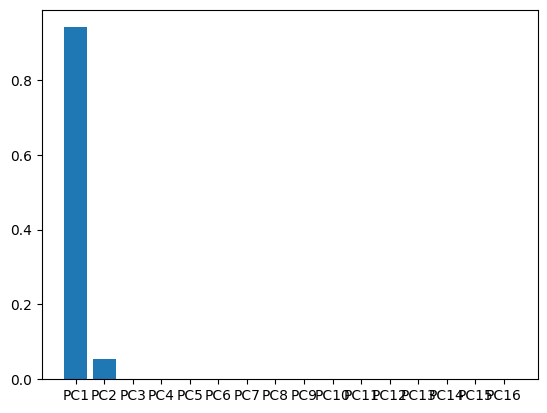

In [29]:
#Now plot a scree plot
plt.bar(x = range(1,pca_variances.index.size+1), height = pca_variances["Explained Variance"], tick_label = pca_columns)
plt.xlabel = "Principal Component"
plt.ylabel = "Percentage of Explained Variance"
plt.title = "Scree Plot"
plt.show()

In [30]:
pca_df = pd.DataFrame(data_pca,index = outcomedata,columns = pca_columns)
pca_df = pca_df.reset_index()

pca_df

,Outcome,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0,-22.713566,-1.945241,0.475151,0.053628,-0.763678,0.460444,0.398326,0.608305,-0.732667,-0.233823,0.335417,0.562249,-0.727113,-0.091371,-0.044037,-0.013032
1,0,-30.703740,-1.610273,-0.450310,2.328157,0.710300,-1.267033,0.691394,-0.497556,-0.080655,-0.413940,-0.177412,0.690166,-0.411746,0.842880,0.866297,-0.159468
2,0,-9.632745,-0.628701,-0.157324,1.558896,0.402225,0.424832,0.162548,-0.269204,1.242567,0.214108,-0.112246,0.732345,-0.744886,-0.097469,-0.129047,-0.004496
3,1,0.562817,2.739220,1.216522,2.260550,0.324832,-0.527475,0.175120,-0.886538,1.021384,0.637406,0.331100,0.737707,0.502097,-0.303568,-0.069861,0.085413
4,1,3.110309,-2.152203,0.919113,-1.121337,0.903137,-0.043381,0.510765,-0.629441,0.178550,0.584962,0.875889,0.704436,0.139183,-0.232161,-0.009694,0.093371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,44.579589,-6.181504,-0.110818,0.174081,-0.430317,-0.904870,-0.700829,0.219213,0.288397,-0.167972,0.042759,-0.009946,-0.062250,-0.005634,-0.012935,-0.030308
2107,1,46.960594,-5.314474,-0.122907,0.486605,-0.166149,-0.779709,0.143808,0.079417,0.032129,-0.315888,0.152362,-0.113698,-0.109718,-0.018525,-0.013568,0.001802
2108,1,46.955572,-4.321760,-0.020369,0.565709,-0.157904,-0.762430,0.142077,0.084116,0.034157,-0.311302,0.156458,-0.122582,-0.115474,-0.014866,-0.017957,0.007157
2109,1,46.710282,-2.324894,0.186640,0.723899,-0.143093,-0.728628,0.139563,0.092506,0.037590,-0.303578,0.162182,-0.139380,-0.124039,-0.008252,-0.026734,-0.001500


In [31]:
# Create a scatter plot using Plotly Express
fig = px.scatter(pca_df, x="PC1", y="PC2", color="Outcome", 
                 title="Scatter Plot of PC1 vs PC2")
# Show the plot
fig.show()

## K-Means Clustering

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/threadpoolctl.py:1019: RuntimeWarning:

libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: Future

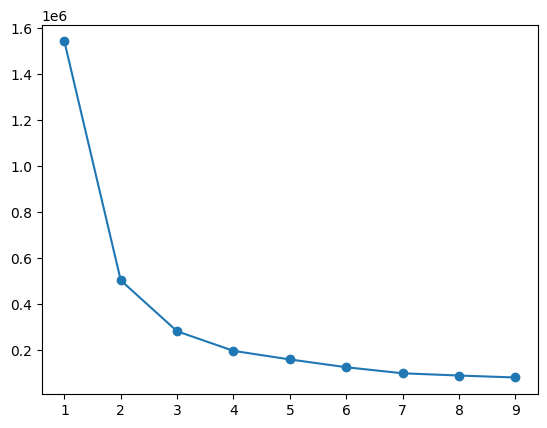

In [32]:
def find_best_no_cluster(df_dummy,k_max):
  means=[]
  sse = []
  for k in range(1,k_max):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data_copy)

    means.append(k)
    sse.append(kmeans.inertia_)

  #draw elbow graph
  plt.plot(means,sse,'o-')
  plt.xlabel = ("Number of Clusters")
  plt.ylabel = ("SSE")
  plt.title = ("Elbow Method")
  plt.show()


find_best_no_cluster(selected_data_standardized,10)

In [33]:
# Applying Kmeans clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(selected_data_standardized)
selected_data_standardized['cluster']  = kmeans.labels_
selected_data_standardized

/Users/ahmedomar/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome,cluster
0,0,21,1.620000,64.000000,1,0,2,3,0,2,0,0,1,3,3,0,0
1,0,21,1.520000,56.000000,1,0,3,3,1,3,1,3,0,2,3,0,0
2,1,23,1.800000,77.000000,1,0,2,3,0,2,0,2,1,1,3,0,0
3,1,27,1.800000,87.000000,0,0,3,3,0,2,0,2,0,1,4,1,0
4,1,22,1.780000,89.800000,0,0,2,1,0,2,0,0,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,0,1,0,1,0,2,3,1,1
2107,0,21,1.748584,133.742943,1,1,3,3,0,2,0,1,0,2,3,1,1
2108,0,22,1.752206,133.689352,1,1,3,3,0,2,0,1,0,2,3,1,1
2109,0,24,1.739450,133.346641,1,1,3,3,0,2,0,1,0,2,3,1,1


In [34]:
pca_df["cluster"] =  kmeans.labels_

pca_df

,Outcome,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,cluster
0,0,-22.713566,-1.945241,0.475151,0.053628,-0.763678,0.460444,0.398326,0.608305,-0.732667,-0.233823,0.335417,0.562249,-0.727113,-0.091371,-0.044037,-0.013032,0
1,0,-30.703740,-1.610273,-0.450310,2.328157,0.710300,-1.267033,0.691394,-0.497556,-0.080655,-0.413940,-0.177412,0.690166,-0.411746,0.842880,0.866297,-0.159468,0
2,0,-9.632745,-0.628701,-0.157324,1.558896,0.402225,0.424832,0.162548,-0.269204,1.242567,0.214108,-0.112246,0.732345,-0.744886,-0.097469,-0.129047,-0.004496,0
3,1,0.562817,2.739220,1.216522,2.260550,0.324832,-0.527475,0.175120,-0.886538,1.021384,0.637406,0.331100,0.737707,0.502097,-0.303568,-0.069861,0.085413,0
4,1,3.110309,-2.152203,0.919113,-1.121337,0.903137,-0.043381,0.510765,-0.629441,0.178550,0.584962,0.875889,0.704436,0.139183,-0.232161,-0.009694,0.093371,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,44.579589,-6.181504,-0.110818,0.174081,-0.430317,-0.904870,-0.700829,0.219213,0.288397,-0.167972,0.042759,-0.009946,-0.062250,-0.005634,-0.012935,-0.030308,1
2107,1,46.960594,-5.314474,-0.122907,0.486605,-0.166149,-0.779709,0.143808,0.079417,0.032129,-0.315888,0.152362,-0.113698,-0.109718,-0.018525,-0.013568,0.001802,1
2108,1,46.955572,-4.321760,-0.020369,0.565709,-0.157904,-0.762430,0.142077,0.084116,0.034157,-0.311302,0.156458,-0.122582,-0.115474,-0.014866,-0.017957,0.007157,1
2109,1,46.710282,-2.324894,0.186640,0.723899,-0.143093,-0.728628,0.139563,0.092506,0.037590,-0.303578,0.162182,-0.139380,-0.124039,-0.008252,-0.026734,-0.001500,1


In [35]:
fig = px.scatter(pca_df, x="PC1", y="PC2", color="cluster",
                 title="KMeans Clustering")
fig.show()

In [36]:
# Create a scatter plot with three principal components
fig = px.scatter_3d(pca_df, x="PC1", y="PC2", z="PC3", color="Outcome",
                    title="KMeans Clustering")
# Show the plot
fig.show()


## Logistic Regression

In [37]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,High_Calorie,Vegetables,Number_of_meals,Smoke,Water_consumption,Calorie_Monitoring,Physical_Acitivity,Time_on_Technology,Alcohol_consumption,Transportation_method,Outcome
0,0,21,1.620000,64.000000,1,0,2,3,0,2,0,0,1,3,3,0
1,0,21,1.520000,56.000000,1,0,3,3,1,3,1,3,0,2,3,0
2,1,23,1.800000,77.000000,1,0,2,3,0,2,0,2,1,1,3,0
3,1,27,1.800000,87.000000,0,0,3,3,0,2,0,2,0,1,4,1
4,1,22,1.780000,89.800000,0,0,2,1,0,2,0,0,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131.408528,1,1,3,3,0,1,0,1,0,2,3,1
2107,0,21,1.748584,133.742943,1,1,3,3,0,2,0,1,0,2,3,1
2108,0,22,1.752206,133.689352,1,1,3,3,0,2,0,1,0,2,3,1
2109,0,24,1.739450,133.346641,1,1,3,3,0,2,0,1,0,2,3,1


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Create and fit the model 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print the variables and their coefficients in the model
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': model.coef_[0]})
coefficients

X_train shape: (1688, 15)
X_test shape: (423, 15)
y_train shape: (1688,)
y_test shape: (423,)


,Variable,Coefficient
0,Gender,-2.206504
1,Age,0.013446
2,Height,-4.650765
3,Weight,0.331018
4,family_history_with_overweight,0.170284
5,High_Calorie,-0.241454
6,Vegetables,-1.134822
7,Number_of_meals,-0.673375
8,Smoke,-0.535870
9,Water_consumption,0.006077


In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predict using the test data
y_pred = model.predict(X_test)

# Evaluate the model 

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9527186761229315


In [72]:
import statsmodels.api as sm

# Add a constant to test for VIF (Check using R)
X_train_with_const = sm.add_constant(X_train)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_with_const.columns

# Calculate VIF for each variable
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

print("Variance Inflation Factors (VIF):")
vif_data

Variance Inflation Factors (VIF):


,Variable,VIF
0,const,824.201364
1,Gender,1.937904
2,Age,1.921020
3,Height,2.502258
4,Weight,2.191905
5,family_history_with_overweight,1.431291
6,High_Calorie,1.180712
7,Vegetables,1.278976
8,Number_of_meals,1.116370
9,Smoke,1.056518


In [71]:
# Create new data points to predict
new_data = pd.DataFrame({
    'Gender': [1, 0, 1],                                   
    'Age': [27, 40, 23],                                  
    'Height': [1.8, 1.5, 1.9],                        
    'Weight': [87, 70, 60],                               
    'family_history_with_overweight': [0, 1, 0],          
    'High_Calorie': [0, 1, 1],                          
    'Vegetables': [3, 1, 0],
    'Number_of_meals': [3, 1, 4],                        
    'Smoke': [0, 1, 1],                                    
    'Water_consumption': [2, 3, 1],                       
    'Calorie_Monitoring': [1, 1, 1],                       
    'Physical_Acitivity': [2, 2, 1],                      
    'Time_on_Technology': [0, 1, 3],                       
    'Alcohol_consumption': [1, 1, 1],                      
    'Transportation_method': [4, 2, 1],             
})

# Predictions
y_pred_new = model.predict(new_data)

# Print the outcomes
print("Predicted outcomes for new data:")
print(y_pred_new)


Predicted outcomes for new data:
[1 1 0]


## References

1) UCI Machine Learning Repository. (n.d.). Archive.ics.uci.edu.
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition


2) Health Risks. (2016, April 13). Obesity Prevention Source; Harvard T.H. Chan School
of Public Health. https://www.hsph.harvard.edu/obesity-prevention-source/obesity-consequences/health-effects/


3) World Health Organization. (2021, June 9). Obesity and overweight. World Health
Organization. https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight